In [47]:
import numpy as np
import data_util
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
DR_dataset_dir = 'diabetic_dataset'
X_train,Y_train = data_util.load_dr_dataset(DR_dataset_dir)
print('Training data shape',X_train.shape)
print('Training label shape',Y_train.shape)
batch_size,height,width,channels=X_train.shape
filters = np.random.randn(3,3,channels,3)

Training data shape (10000, 32, 32, 3)
Training label shape (10000,)


(10, 32, 32, 3)


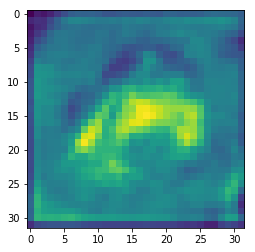

In [70]:
conv_filter_1 = np.array(filters)
X = tf.placeholder(tf.float32)
convolution_1 = tf.nn.conv2d(X,conv_filter_1,strides=[1,1,1,1],padding='SAME')
with tf.Session() as sess:
    output_1 = sess.run(convolution_1,{X:X_train[0:10,:,:,:]})
print(output_1.shape)
plt.imshow(output_1[0,:,:,0])
plt.show()

(10, 16, 16, 3)


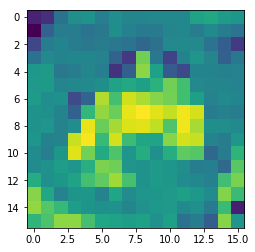

In [72]:
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output_1_pool = sess.run(max_pool,{X:X_train[0:10,:,:,:]})
print(output_1_pool.shape)
plt.imshow(output_1_pool[0,:,:,0])
plt.show()

(10, 16, 16, 3)


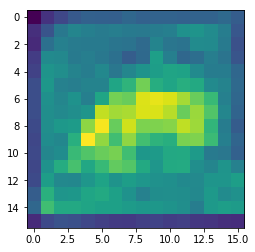

In [78]:
conv_filter_2 = np.array(filters)
convolution_2 = tf.nn.conv2d(X,conv_filter_2,strides=[1,1,1,1],padding="SAME")
with tf.Session() as sess:
    output_2 = sess.run(convolution_2,{X:output_1_pool})
print(output_2.shape)
plt.imshow(output_2[0,:,:,0])
plt.show()